VGGNET16 With Keras and Implants

In [1]:
!pip uninstall -y h5py

!pip install 'h5py < 3.0.0'

Found existing installation: h5py 3.1.0
Uninstalling h5py-3.1.0:
  Successfully uninstalled h5py-3.1.0
     |████████████████████████████████| 2.9 MB 10.0 MB/s 
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow 2.8.0+zzzcolab20220506162203 requires tf-estimator-nightly==2.8.0.dev2021122109, which is not installed.


In [2]:
%tensorflow_version 1.x

TensorFlow 1.x selected.


In [6]:
!pip install -U keras==2.1.5

  Using cached Keras-2.1.5-py2.py3-none-any.whl (334 kB)
  Attempting uninstall: keras
    Found existing installation: keras 2.8.0
    Uninstalling keras-2.8.0:
      Successfully uninstalled keras-2.8.0


In [4]:
import os

import tensorflow as tf
from tensorflow import keras
import glob as glob
print(tf.version.VERSION)

1.15.2


In [7]:
import sys
import datetime
import numpy as np
import cv2
import keras
from keras.applications.vgg16 import VGG16, preprocess_input
from keras.layers import Input
from keras.models import Model
from keras.layers import GlobalAveragePooling2D
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPool2D
from keras.layers import MaxPooling2D
from keras.layers import Flatten
from keras.layers import Dense
from keras.layers import Dropout
from keras.optimizers import SGD
from keras.optimizers import RMSprop
from keras.optimizers import Adam
from keras.preprocessing.image import ImageDataGenerator, array_to_img, img_to_array, load_img
import tensorflow
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

In [8]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [9]:
#Mapping to your location in google drive

import os
os.chdir("/content/drive/MyDrive/1_ImplantProject/dataset_vgg")
!pwd

/content/drive/MyDrive/1_ImplantProject/dataset_vgg


#Run Original Model #1
- Flatten
- 3 Denses (4096, 4096, 3) 
- Optimizer adam(0.001)

# Notes for the results of model1
Total params: 134,272,835
Trainable params: 119,558,147
Non-trainable params: 14,714,688
## Add notes below
Epoch 200/200
165/165 [==============================] - 104s 632ms/step - loss: 10.7454 - acc: 0.3333 - val_loss: 10.8211 - val_acc: 0.3286

Training time: 6:02:34.324783

Test Score: 10.926071867478631

Test Accuracy: 0.3221239000558853

## My notes:
- The accuracy is not increased during traing with 200 epochs, it seems the number of training params are too big cause the model underfitting the features

# Modified VGG16 #2 
- From Flatten to GlobalAveragePooling
- Keep 3 Denses (4096, 4096, 3)
- Adam (0.001)


# Notes for the results of model2
## Add notes below
Epoch 200/200
165/165 [==============================] - 104s 632ms/step - loss: 0.1935 - acc: 0.9182 - val_loss: 0.7930 - val_acc: 0.7301

Training time: 5:48:34.095787

Test Score: 0.749877745730687

Test Accuracy: 0.7469026551837414


# Modified VGG16 #3
- From Flatten to GlobalAveragePooling
- Change from 3 Denses (4096, 4096, 3) to two Denses (4096, 3)
- Adam (0.001)


# Notes for the results of model3
## Add notes below
Epoch 192/200
165/165 [==============================] - 105s 635ms/step - loss: 0.1681 - acc: 0.9370 - val_loss: 0.4837 - val_acc: 0.8248

Epoch 193/200
165/165 [==============================] - 105s 638ms/step - loss: 0.1731 - acc: 0.9303 - val_loss: 0.4254 - val_acc: 0.8441

Epoch 194/200
165/165 [==============================] - 104s 628ms/step - loss: 0.1602 - acc: 0.9418 - val_loss: 0.6466 - val_acc: 0.7737

Epoch 195/200
165/165 [==============================] - 104s 629ms/step - loss: 0.1745 - acc: 0.9352 - val_loss: 0.4998 - val_acc: 0.8096


Training time: 5:46:45.080457
Test Score: 0.6634591279831608
Test Accuracy: 0.7769911489655487

# Modified VGG16 #4
- From Flatten to GlobalAveragePooling
- Change from two Denses (4096, 3) to two denses (1024, 3)
- Adam (0.001)


# Notes for the results of model4
## Add notes below
Epoch 194/200
165/165 [==============================] - 104s 628ms/step - loss: 0.1677 - acc: 0.9382 - val_loss: 0.3331 - val_acc: 0.8750

Epoch 195/200
165/165 [==============================] - 104s 628ms/step - loss: 0.2175 - acc: 0.9133 - val_loss: 0.3630 - val_acc: 0.8629

Epoch 196/200
165/165 [==============================] - 105s 637ms/step - loss: 0.1931 - acc: 0.9248 - val_loss: 0.3873 - val_acc: 0.8600

Training time: 5:46:56.148313

# Modified VGG16 #5
- From Flatten to GlobalAveragePooling
- Change from two Denses (4096, 3) to two denses (1024, 3)
- Adam (0.001)
- Change RELU to ELU

Total params: 15,243,075

Trainable params: 528,387

Non-trainable params: 14,714,688
___________________________________
Epoch 200/200
165/165 [==============================] - 103s 622ms/step - loss: 0.2678 - acc: 0.8933 - val_loss: 0.4544 - val_acc: 0.8209

Training time: 5:51:28.545880

Test Score: 0.4409982794154007

Test Accuracy: 0.8371681349467387


# Visualisation The trainging/test loss and accuracy for all models

In [10]:
!ls -al |grep h5

-rw------- 1 root root   65278472 May 15 12:26 implant_modified_vgg16_model1_tl.1652617609.185081.h5
-rw------- 1 root root 1493640496 May 16 12:25 implant_modified_vgg16_model1_tl.1652703915.669425.h5
-rw------- 1 root root  285681424 May 16 18:14 implant_modified_vgg16_model2_tl.1652724842.445847.h5
-rw------- 1 root root   84300296 May 17 00:00 implant_modified_vgg16_model3_tl.1652745656.773857.h5
-rw------- 1 root root   65278472 May 17 05:47 implant_modified_vgg16_model4_tl.1652766473.338841.h5
-rw------- 1 root root   65278472 May 17 12:57 implant_modified_vgg16_model5_tl.1652792252.470058.h5
-rw------- 1 root root   65278472 May 15 12:19 vgg16_model4_200epoch_15.May.h5


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

perf_df1 = pd.read_csv('./training_log/model1_acc_loss.csv')
perf_df2 = pd.read_csv('./training_log/model2_acc_loss.csv')
perf_df3 = pd.read_csv('./training_log/model3_acc_loss.csv')
perf_df4 = pd.read_csv('./training_log/model4_acc_loss.csv')
perf_df5 = pd.read_csv('./training_log/model5_acc_loss.csv')

#Total training time for each model
print("Model 1 Training Time:", '{:.2f}'.format(perf_df1.time_s.sum()/60/60), " Hours")
print("Model 2 Training Time:", '{:.2f}'.format(perf_df2.time_s.sum()/60/60), " Hours")
print("Model 3 Training Time:", '{:.2f}'.format(perf_df3.time_s.sum()/60/60), " Hours")
print("Model 4 Training Time:", '{:.2f}'.format(perf_df4.time_s.sum()/60/60), " Hours")
print("Model 5 Training Time:", '{:.2f}'.format(perf_df5.time_s.sum()/60/60), " Hours")

Model 1 Training Time: 6.04  Hours
Model 2 Training Time: 5.81  Hours
Model 3 Training Time: 5.78  Hours
Model 4 Training Time: 5.78  Hours
Model 5 Training Time: 5.86  Hours


In [ ]:
def visualize_results(history, title):
    # Plot the accuracy and loss curves
    acc = history['training_acc']
    val_acc = history['val_acc']
    loss = history['training_loss']
    val_loss = history['val_loss']

    epochs = range(len(acc))

    plt.plot(epochs, acc, 'b', label='Training acc')
    plt.plot(epochs, val_acc, 'r', label='Validation acc')
    plt.title(title + ' Training and validation accuracy')
    plt.legend()

    plt.figure()

    plt.plot(epochs, loss, 'b', label='Training loss')
    plt.plot(epochs, val_loss, 'r', label='Validation loss')
    plt.title(title + ' Training and validation loss')
    plt.legend()

    plt.show()
    


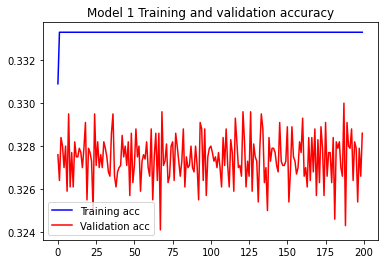

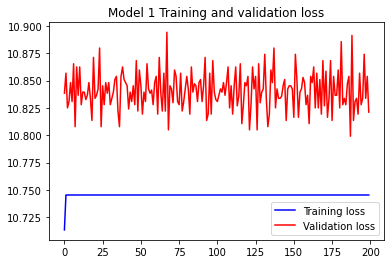

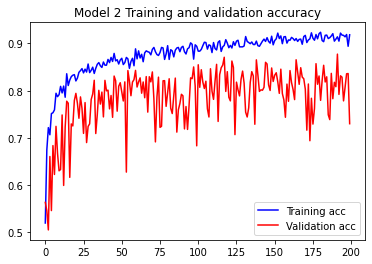

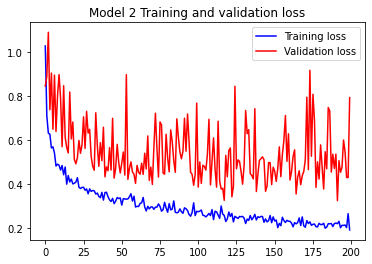

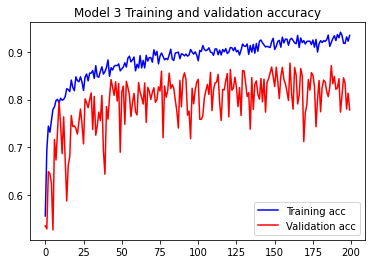

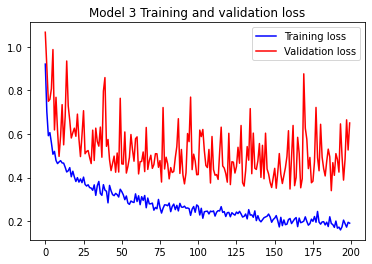

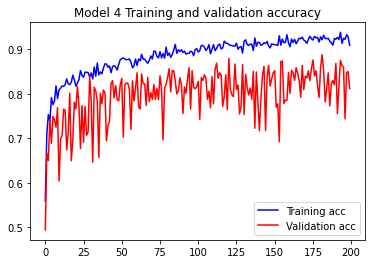

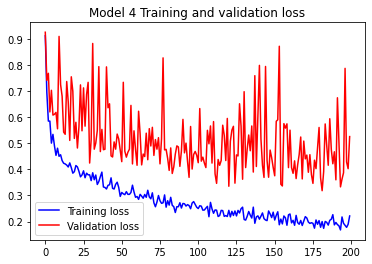

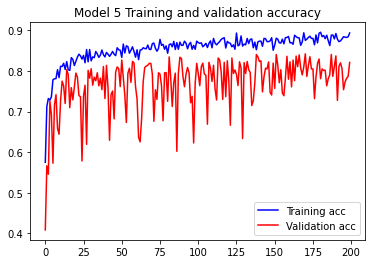

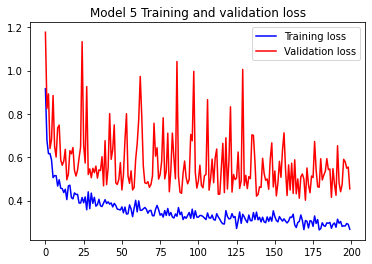

In [ ]:
visualize_results(perf_df1, "Model 1")
visualize_results(perf_df2, "Model 2")
visualize_results(perf_df3, "Model 3")
visualize_results(perf_df4, "Model 4")
visualize_results(perf_df5, "Model 5")

In [ ]:
#Get the max() both training_acc and val_acc but they maybe not come together
print("Model ", "Highest training acc", "Highest validating acc") 
print("Model1", perf_df1.training_acc.max(), "     ",perf_df1.val_acc.max())
print("Model2", perf_df2.training_acc.max(), "     ",perf_df2.val_acc.max())
print("Model3", perf_df3.training_acc.max(), "     ",perf_df3.val_acc.max())
print("Model4", perf_df4.training_acc.max(), "     ",perf_df4.val_acc.max())
print("Model5", perf_df5.training_acc.max(), "     ",perf_df5.val_acc.max())
print("-"*45)
#Get the max() of val acc then figure out the training at that line
print("Model ", "Optional training acc", "Best validating acc") 
print("Model1", perf_df1[perf_df1.val_acc == perf_df1.val_acc.max()].training_acc.max(), "     ",perf_df1.val_acc.max())
print("Model2", perf_df2[perf_df2.val_acc == perf_df2.val_acc.max()].training_acc.max(), "     ",perf_df2.val_acc.max())
print("Model3", perf_df3[perf_df3.val_acc == perf_df3.val_acc.max()].training_acc.max(), "     ",perf_df3.val_acc.max())
print("Model4", perf_df4[perf_df4.val_acc == perf_df4.val_acc.max()].training_acc.max(), "     ",perf_df4.val_acc.max())
print("Model5", perf_df5[perf_df5.val_acc == perf_df5.val_acc.max()].training_acc.max(), "     ",perf_df5.val_acc.max())

Model  Highest training acc Highest validating acc
Model1 0.3333       0.33
Model2 0.9236       0.8773
Model3 0.9418       0.877
Model4 0.9382       0.888
Model5 0.8952       0.8421
---------------------------------------------
Model  Optional training acc Best validating acc
Model1 0.3333       0.33
Model2 0.9139       0.8773
Model3 0.9261       0.877
Model4 0.9212       0.888
Model5 0.8752       0.8421


# Predict the new images with different models

In [ ]:
!ls -la
!pwd

total 2074957
-rw------- 1 root root   65278472 May 15 12:26 implant_modified_vgg16_model1_tl.1652617609.185081.h5
-rw------- 1 root root 1493640496 May 16 12:25 implant_modified_vgg16_model1_tl.1652703915.669425.h5
-rw------- 1 root root  285681424 May 16 18:14 implant_modified_vgg16_model2_tl.1652724842.445847.h5
-rw------- 1 root root   84300296 May 17 00:00 implant_modified_vgg16_model3_tl.1652745656.773857.h5
-rw------- 1 root root   65278472 May 17 05:47 implant_modified_vgg16_model4_tl.1652766473.338841.h5
-rw------- 1 root root   65278472 May 17 12:57 implant_modified_vgg16_model5_tl.1652792252.470058.h5
drwx------ 5 root root       4096 May 15 12:22 test
drwx------ 3 root root       4096 May  3 15:34 train
drwx------ 2 root root       4096 May 17 10:17 training_log
drwx------ 2 root root       4096 May  3 15:34 val
-rw------- 1 root root   65278472 May 15 12:19 vgg16_model4_200epoch_15.May.h5
/content/drive/MyDrive/1_ImplantProject/dataset_vgg


In [11]:
from keras.models import load_model
import warnings
warnings.filterwarnings("ignore")

mod_model1 = load_model('implant_modified_vgg16_model1_tl.1652703915.669425.h5')
mod_model2 = load_model('implant_modified_vgg16_model2_tl.1652724842.445847.h5')
mod_model3 = load_model('implant_modified_vgg16_model3_tl.1652745656.773857.h5')
mod_model4 = load_model('implant_modified_vgg16_model4_tl.1652766473.338841.h5')
mod_model5 = load_model('implant_modified_vgg16_model5_tl.1652792252.470058.h5')












Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where




# Calculate the confusion matrix, precision, recall, f1 score  for these models
[NOT COMPETE YET - INPROGRESS]

In [ ]:
!pwd

/content/drive/MyDrive/1_ImplantProject/dataset_vgg


In [12]:
#confusion matrix
#1.Predict classes

height, width = (224,224)
batch_size = 1
test_dir = './test'

dirs = ["bego", "bicon", "straumann"]

listTestFiles_df = pd.DataFrame(columns=['filepath', 'true_label', 'predict_label', 'bego', 'bicon', 'straumann'])

for dir in dirs:
  true_label = dir
  path = test_dir + "/" + dir + "/*"
  files=glob.glob(path)
  for filename in files:
    listTestFiles_df = listTestFiles_df.append({'filepath': filename, 'true_label': true_label, 'predict_label': 'na', 'bego':'0', 'bicon':'0', 'straumann':'0'}, ignore_index=True)


In [13]:
listTestFiles_df.head()

,filepath,true_label,predict_label,bego,bicon,straumann
0,./test/bego/bego (895).jpg,bego,na,0,0,0
1,./test/bego/bego (995).jpg,bego,na,0,0,0
2,./test/bego/bego (997).jpg,bego,na,0,0,0
3,./test/bego/bego (999).jpg,bego,na,0,0,0
4,./test/bego/bego (992).jpg,bego,na,0,0,0


In [14]:
print("Bego records:", listTestFiles_df[listTestFiles_df.true_label == 'bego'].true_label.count())
print("Bicon records:",listTestFiles_df[listTestFiles_df.true_label == 'bicon'].true_label.count())
print("Straumann records:",listTestFiles_df[listTestFiles_df.true_label == 'straumann'].true_label.count())

Bego records: 200
Bicon records: 200
Straumann records: 200


In [15]:
from keras.preprocessing import image

image_list = listTestFiles_df.filepath

#5 copied dataframes for 5 models
model1_df = listTestFiles_df.copy()
model2_df = listTestFiles_df.copy()
model3_df = listTestFiles_df.copy()
model4_df = listTestFiles_df.copy()
model5_df = listTestFiles_df.copy()


def get_pred_label(outcome):
  result = ""
  values = [outcome[0][0],outcome[0][1],outcome[0][2]]
  if (outcome[0][0] == max(values)):
    result = "bego"
  if (outcome[0][1] == max(values)):
    result = "bicon"
  if (outcome[0][2] == max(values)):
    result ="straumann"
  print(result)
  return result

ind = 0
for item in image_list:
    print("\n", item)
    im = cv2.imread(item)
    im = cv2.resize(cv2.cvtColor(im, cv2.COLOR_BGR2RGB), (224, 224)).astype(np.float32) / 255.0
    im = np.expand_dims(im, axis =0) 
    
    #Modifed model 1
    print("="*30)
    print("              bego    bicon    straumann")
    outcome1 = None
    outcome1 = mod_model1.predict(im)
    print("Model 1      {0:.0%}       {1:.0%}       {2:.0%}".format(outcome1[0][0], outcome1[0][1], outcome1[0][2]))
    model1_df['predict_label'][ind] = get_pred_label(outcome1)
    model1_df['bego'][ind] = outcome1[0][0]
    model1_df['bicon'][ind] = outcome1[0][1]
    model1_df['straumann'][ind] = outcome1[0][2]

    #Modifed model 2
    outcome2 = None
    outcome2 = mod_model2.predict(im)
    print("Model 2      {0:.0%}       {1:.0%}       {2:.0%}".format(outcome2[0][0], outcome2[0][1], outcome2[0][2]))
    model2_df['predict_label'][ind]  = get_pred_label(outcome2)
    model2_df['bego'][ind] = outcome2[0][0]
    model2_df['bicon'][ind] = outcome2[0][1]
    model2_df['straumann'][ind] = outcome2[0][2]
    
    #Modifed model 3
    outcome3 = None
    outcome3 = mod_model3.predict(im)
    print("Model 3      {0:.0%}       {1:.0%}       {2:.0%}".format(outcome3[0][0], outcome3[0][1], outcome3[0][2]))
    model3_df['predict_label'][ind]  = get_pred_label(outcome3)
    model3_df['bego'][ind] = outcome3[0][0]
    model3_df['bicon'][ind] = outcome3[0][1]
    model3_df['straumann'][ind] = outcome3[0][2]

    #Modifed model 4
    outcome4 = None
    outcome4 = mod_model4.predict(im)
    print("Model 4      {0:.0%}       {1:.0%}       {2:.0%}".format(outcome4[0][0], outcome4[0][1], outcome4[0][2]))
    model4_df['predict_label'][ind]  = get_pred_label(outcome4)
    model4_df['bego'][ind] = outcome4[0][0]
    model4_df['bicon'][ind] = outcome4[0][1]
    model4_df['straumann'][ind] = outcome4[0][2]

    #Modifed model 5
    outcome5 = None
    outcome5 = mod_model5.predict(im)
    print("Model 5      {0:.0%}       {1:.0%}       {2:.0%}".format(outcome5[0][0], outcome5[0][1], outcome5[0][2]))
    model5_df['predict_label'][ind]  = get_pred_label(outcome5)
    model5_df['bego'][ind] = outcome5[0][0]
    model5_df['bicon'][ind] = outcome5[0][1]
    model5_df['straumann'][ind] = outcome5[0][2]
    print("="*30)

    #increase index
    ind += 1

Streaming output truncated to the last 5000 lines.
Model 4      26%       11%       63%
straumann
Model 5      7%       4%       89%
straumann

 ./test/bicon/bicon (875).jpg
              bego    bicon    straumann
Model 1      100%       0%       0%
bego
Model 2      0%       100%       0%
bicon
Model 3      0%       100%       0%
bicon
Model 4      0%       100%       0%
bicon
Model 5      0%       100%       0%
bicon

 ./test/bicon/bicon (854).jpg
              bego    bicon    straumann
Model 1      100%       0%       0%
bego
Model 2      99%       0%       1%
bego
Model 3      100%       0%       0%
bego
Model 4      76%       0%       24%
bego
Model 5      97%       0%       3%
bego

 ./test/bicon/bicon (865).jpg
              bego    bicon    straumann
Model 1      100%       0%       0%
bego
Model 2      0%       100%       0%
bicon
Model 3      0%       100%       0%
bicon
Model 4      0%       100%       0%
bicon
Model 5      0%       100%       0%
bicon

 ./test/bicon/bicon

In [16]:
print(model1_df.true_label.unique(), model1_df.predict_label.unique()) #Can see that the model predict any picture to "bego"
print(model2_df.true_label.unique(), model2_df.predict_label.unique())
print(model3_df.true_label.unique(), model3_df.predict_label.unique())
print(model4_df.true_label.unique(), model4_df.predict_label.unique())
print(model5_df.true_label.unique(), model5_df.predict_label.unique())

['bego' 'bicon' 'straumann'] ['bego']
['bego' 'bicon' 'straumann'] ['straumann' 'bego' 'bicon']
['bego' 'bicon' 'straumann'] ['straumann' 'bego' 'bicon']
['bego' 'bicon' 'straumann'] ['straumann' 'bego' 'bicon']
['bego' 'bicon' 'straumann'] ['straumann' 'bego' 'bicon']


In [17]:
#Save csv files for backup
timestamp = datetime.datetime.now().strftime("%Y%m%d-%H%M%S")

model1_df.to_csv('./testresult/model1_test_result.' + str(timestamp) + '.csv',index=False)
model2_df.to_csv('./testresult/model2_test_result.'+ str(timestamp) + '.csv',index=False)
model3_df.to_csv('./testresult/model3_test_result.'+ str(timestamp) + '.csv',index=False)
model4_df.to_csv('./testresult/model4_test_result.'+ str(timestamp) + '.csv',index=False)
model5_df.to_csv('./testresult/model5_test_result.'+ str(timestamp) + '.csv',index=False)

In [18]:
# 3. Use scikit-learn to get statistics
from sklearn.metrics import confusion_matrix,classification_report
import seaborn as sns
import matplotlib.pyplot as plt  

def confusion_pre_recall_f1(input_model, title):
  print(title)
  cm1 = confusion_matrix(input_model.true_label, input_model.predict_label)
  print(cm1)
  print("-"*30)
  report1 = classification_report(input_model.true_label, input_model.predict_label)
  print(report1)
  print("-"*30)
  ax= plt.subplot()
  sns.heatmap(cm1, annot=True, fmt='g', ax=ax);
  # labels, title and ticks
  ax.set_xlabel('Predicted labels');ax.set_ylabel('True labels'); 
  ax.set_title(title); 
  ax.xaxis.set_ticklabels(['Bego', 'Bicon', 'Straumann']); ax.yaxis.set_ticklabels(['Bego', 'Bicon', 'Straumann']);

Confusion Matrix Model 1
[[200   0   0]
 [200   0   0]
 [200   0   0]]
------------------------------
              precision    recall  f1-score   support

        bego       0.33      1.00      0.50       200
       bicon       0.00      0.00      0.00       200
   straumann       0.00      0.00      0.00       200

    accuracy                           0.33       600
   macro avg       0.11      0.33      0.17       600
weighted avg       0.11      0.33      0.17       600

------------------------------


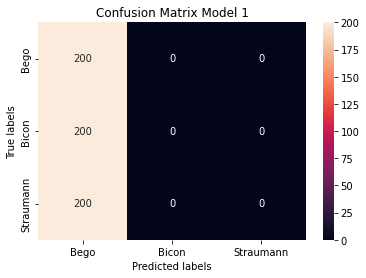

In [19]:
confusion_pre_recall_f1(model1_df,'Confusion Matrix Model 1')

Confusion Matrix Model 2
[[180   1  19]
 [ 59 115  26]
 [ 35   1 164]]
------------------------------
              precision    recall  f1-score   support

        bego       0.66      0.90      0.76       200
       bicon       0.98      0.57      0.73       200
   straumann       0.78      0.82      0.80       200

    accuracy                           0.77       600
   macro avg       0.81      0.77      0.76       600
weighted avg       0.81      0.77      0.76       600

------------------------------


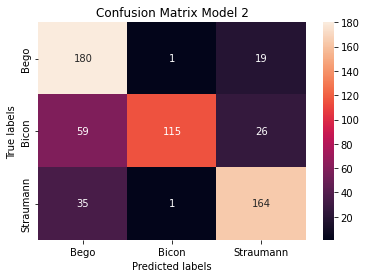

In [20]:
confusion_pre_recall_f1(model2_df,'Confusion Matrix Model 2')


Confusion Matrix Model 3
[[187   0  13]
 [ 39 138  23]
 [ 52   4 144]]
------------------------------
              precision    recall  f1-score   support

        bego       0.67      0.94      0.78       200
       bicon       0.97      0.69      0.81       200
   straumann       0.80      0.72      0.76       200

    accuracy                           0.78       600
   macro avg       0.81      0.78      0.78       600
weighted avg       0.81      0.78      0.78       600

------------------------------


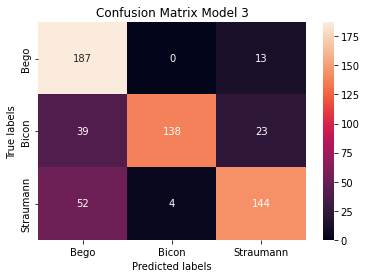

In [21]:
confusion_pre_recall_f1(model3_df,'Confusion Matrix Model 3')


Confusion Matrix Model 4
[[184   3  13]
 [ 38 136  26]
 [ 42   3 155]]
------------------------------
              precision    recall  f1-score   support

        bego       0.70      0.92      0.79       200
       bicon       0.96      0.68      0.80       200
   straumann       0.80      0.78      0.79       200

    accuracy                           0.79       600
   macro avg       0.82      0.79      0.79       600
weighted avg       0.82      0.79      0.79       600

------------------------------


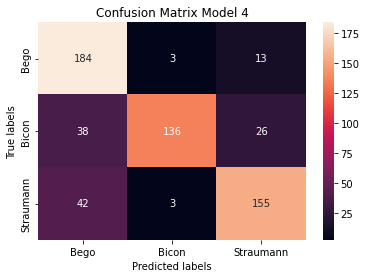

In [22]:
confusion_pre_recall_f1(model4_df,'Confusion Matrix Model 4')


Confusion Matrix Model 5
[[171   8  21]
 [ 17 147  36]
 [ 40  10 150]]
------------------------------
              precision    recall  f1-score   support

        bego       0.75      0.85      0.80       200
       bicon       0.89      0.73      0.81       200
   straumann       0.72      0.75      0.74       200

    accuracy                           0.78       600
   macro avg       0.79      0.78      0.78       600
weighted avg       0.79      0.78      0.78       600

------------------------------


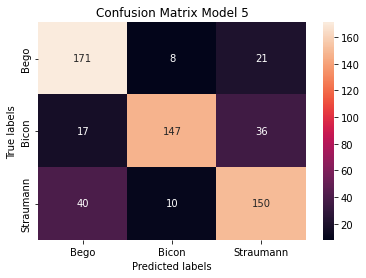

In [23]:
confusion_pre_recall_f1(model5_df,'Confusion Matrix Model 5')

#Summary 

|Model |H5 size: | h5 name | Training time (200 epochs)|                                Best training acc| Best validating acc | Notes |
|---|---|---|---|---|---|---|
|Model 1| 1.38GB |implant_modified_vgg16_model1_tl.1652703915.669425.h5 | 6.04  Hours| 0.3333 |      0.33 |
| Model 2| 272.4 MB |implant_modified_vgg16_model2_tl.1652724842.445847.h5|5.81  Hours|0.9139 |     0.8773 |
|Model 3| 80.4MB |implant_modified_vgg16_model3_tl.1652745656.773857.h5| 5.78  Hours|  0.9261 |     0.877 |
| **Model 4** | 62.3MB (smallest) | implant_modified_vgg16_model4_tl.1652766473.338841.h5|5.78  Hours (fastest)|0.9212 |     0.888 | Best combination of training and val acc |
| Model 5 | 62.3MB | implant_modified_vgg16_model5_tl.1652792252.470058.h5|5.86  Hours|0.8752  |    0.8421 |

Average values for Precision, Recall, F1-Score and Accuracy

|Model | Precision| Recall| F1-Score |Accurracy| Notes|
|---|---|---|---|---|---|
|Model 1 | 0.11 |0.33 | 0.17| 0.33| Worst|
|Model 2 | 0.81 |0.77 | 0.76|0.77 |
|Model 3 | 0.81 |0.78 | 0.78|0.78 |
|Model 4 | 0.82 |0.79 | 0.79|0.79 | Best |
|Model 5 | 0.79 |0.78 | 0.78| 0.78|

# Ensembel 4 models (2 -> 5),  not include original vgg16 (model #1) since it's result too bad.

In [ ]:
ensemble_df = pd.DataFrame(columns=['filepath', 'true_label', 'predict_label', 'bego', 'bicon', 'straumann'])

ensemble_df['filepath'] = model2_df['filepath']
ensemble_df['true_label'] = model2_df['true_label']

for ind in range(0, len(model1_df)):
  #Calculate by average value of 4 models
  ensemble_df['bego'][ind] = (model2_df['bego'][ind] + model3_df['bego'][ind] + model4_df['bego'][ind] + model5_df['bego'][ind])/4
  ensemble_df['bicon'][ind] = (model2_df['bicon'][ind] + model3_df['bicon'][ind] + model4_df['bicon'][ind] + model5_df['bicon'][ind])/4
  ensemble_df['straumann'][ind] = (model2_df['straumann'][ind] + model3_df['straumann'][ind] + model4_df['straumann'][ind] + model5_df['straumann'][ind])/4
  
  #Select the predict_value from highest probability
  ensemble_df['predict_label'][ind] = get_pred_label([[ensemble_df['bego'][ind] ,ensemble_df['bicon'][ind],ensemble_df['straumann'][ind]]])



Confusion Matrix Ensemble Model
[[184   3  13]
 [ 40 134  26]
 [ 41   3 156]]
------------------------------
              precision    recall  f1-score   support

        bego       0.69      0.92      0.79       200
       bicon       0.96      0.67      0.79       200
   straumann       0.80      0.78      0.79       200

    accuracy                           0.79       600
   macro avg       0.82      0.79      0.79       600
weighted avg       0.82      0.79      0.79       600

------------------------------


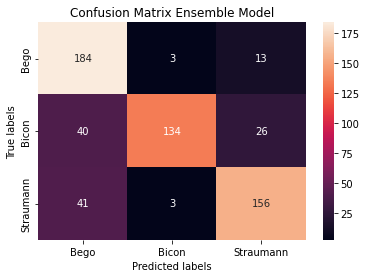

In [47]:
confusion_pre_recall_f1(ensemble_df,'Confusion Matrix Ensemble Model')
#Combine of result from model 2 -> 5

Confusion Matrix Ensemble Model
[[184   3  13]
 [ 38 136  26]
 [ 42   3 155]]
------------------------------
              precision    recall  f1-score   support

        bego       0.70      0.92      0.79       200
       bicon       0.96      0.68      0.80       200
   straumann       0.80      0.78      0.79       200

    accuracy                           0.79       600
   macro avg       0.82      0.79      0.79       600
weighted avg       0.82      0.79      0.79       600

------------------------------


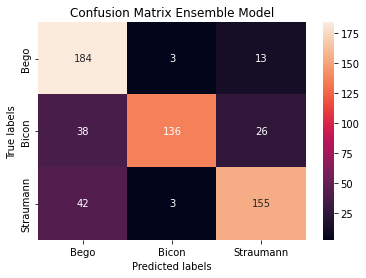

In [45]:
#Re draw to compare
confusion_pre_recall_f1(model4_df,'Confusion Matrix Ensemble Model')

# Ensemble 2 models 2 & 4

In [ ]:
ensemble2_4_df = pd.DataFrame(columns=['filepath', 'true_label', 'predict_label', 'bego', 'bicon', 'straumann'])

ensemble2_4_df['filepath'] = model2_df['filepath']
ensemble2_4_df['true_label'] = model2_df['true_label']

for ind in range(0, len(model1_df)):
  #Calculate by average value of 2 models
  ensemble2_4_df['bego'][ind] = (model2_df['bego'][ind] + model4_df['bego'][ind])/2
  ensemble2_4_df['bicon'][ind] = ( model2_df['bicon'][ind] + model4_df['bicon'][ind])/2
  ensemble2_4_df['straumann'][ind] = (model2_df['straumann'][ind] + model4_df['straumann'][ind])/2
  
  #Select the predict_value from highest probability
  ensemble2_4_df['predict_label'][ind] = get_pred_label([[ensemble2_4_df['bego'][ind] ,ensemble2_4_df['bicon'][ind],ensemble2_4_df['straumann'][ind]]])


Confusion Matrix Ensemble Model 2 & 4
[[182   2  16]
 [ 51 125  24]
 [ 37   3 160]]
------------------------------
              precision    recall  f1-score   support

        bego       0.67      0.91      0.77       200
       bicon       0.96      0.62      0.76       200
   straumann       0.80      0.80      0.80       200

    accuracy                           0.78       600
   macro avg       0.81      0.78      0.78       600
weighted avg       0.81      0.78      0.78       600

------------------------------


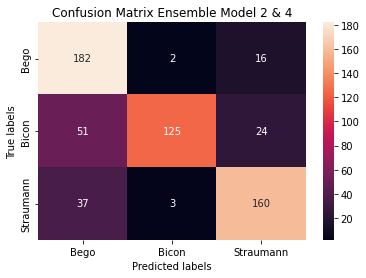

In [49]:
confusion_pre_recall_f1(ensemble2_4_df,'Confusion Matrix Ensemble Model 2 & 4')
#Combine of result from model 2 & 4